In [1]:
#imports packages
import pandas as pd
import tweepy
import requests
import os
import json

### Gather

In [2]:
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(image_prediction_url, auth=('user', 'pass')) #gathers data from the url specified

r.status_code #returns status code

200

In [3]:
with open(os.path.join(
    image_prediction_url.split('/')[-1]), mode = 'wb') as file:
        file.write(r.content) #writes file to a path with an appropriate name

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep ='\t') #reads tsv file

In [5]:
archived = pd.read_csv('twitter-archive-enhanced.csv') #read csv file

In [6]:
#request data from twitter api
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

In [7]:
# List of dictionaries to build and convert to a DataFrame later
tweet_ids = image_predictions['tweet_id'].tolist()
tweet_list = []
tweet_errors = []

from timeit import default_timer as timer
start = timer()

for ids in tweet_ids:
    try:
        page = api.get_status(ids)
        retweets = page['retweet_count']
        favorites = page['favorite_count']
        tweet_list.append({'tweet_id': int(ids),
                        'favorites': int(favorites),
                        'retweets': int(retweets)}) #Appends dictionary to tweet_list
    except Exception as e:
        tweet_errors.append(ids)
        print(str(ids) + "_" + str(e)) #stores all excepttions
        
        break
        
end = timer()
print(end - start) #returns time taken for operation

680055455951884288_[{'code': 144, 'message': 'No status found with that ID.'}]
112.48768332000009


In [8]:
with open('tweet_list.txt', 'w') as outfile:  
    json.dump(tweet_list, outfile) #converts .txt file to json

In [9]:
with open('tweet_list.txt') as json_file:  
    tweet_list = json.load(json_file) #loads json file

In [10]:
tweets = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorites', 'retweets']) #coverts file to data frame with column names
tweets = tweets.sort_values('tweet_id').reset_index(drop=True) #sorts values and resets index

### Assess

In [11]:
archived #returns dataframe

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
image_predictions #returns dataframe

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
tweets #returns dataframe

,tweet_id,favorites,retweets
0,666020888022790149,2530,498
1,666029285002620928,126,46
2,666033412701032449,123,43
3,666044226329800704,292,136
4,666049248165822465,106,42
5,666050758794694657,130,57
6,666051853826850816,1196,831
7,666055525042405380,427,235
8,666057090499244032,289,138
9,666058600524156928,109,57


In [14]:
image_predictions.info() #returns information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
archived.info() #returns information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
tweets.info() #returns information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 3 columns):
tweet_id     607 non-null int64
favorites    607 non-null int64
retweets     607 non-null int64
dtypes: int64(3)
memory usage: 14.3 KB


In [17]:
archived.name.value_counts() #returns values and the count for 'name' column in dataframe

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Bailey         7
Buddy          7
Daisy          7
an             7
Dave           6
Scout          6
Oscar          6
Bella          6
Jax            6
Jack           6
Rusty          6
Stanley        6
Leo            6
Koda           6
Milo           6
Louis          5
            ... 
Asher          1
Oddie          1
Fillup         1
Vince          1
Emmie          1
Cora           1
Kingsley       1
Willy          1
Lorelei        1
Scruffers      1
Margo          1
Nimbus         1
Swagger        1
Miguel         1
Pippin         1
Rudy           1
Lance          1
Jeremy         1
JD             1
O              1
Ralphé         1
Spencer        1
Sora           1
Maks           1
Remus          1
Comet          1
Mabel          1
Fletcher      

In [18]:
archived.rating_denominator.value_counts() #returns values and the count for 'rating_denominator' column in dataframe

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
archived[archived['in_reply_to_status_id'].isnull()] ##returns null values in specified column

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [20]:
image_predictions.describe() #returns descriptive statistics of dataframe

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
archived.describe() #returns descriptive statistics of dataframe

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
tweets.describe() #returns descriptive statistics of dataframe

,tweet_id,favorites,retweets
count,6.070000e+02,607.000000,607.000000
mean,6.719125e+17,2302.291598,983.456343
std,3.751865e+15,6052.305316,2651.091228
min,6.660209e+17,0.000000,11.000000
25%,6.686445e+17,556.000000,217.500000
50%,6.715114e+17,1103.000000,411.000000
75%,6.747664e+17,1827.000000,762.000000
max,6.798771e+17,82121.000000,33623.000000


#### Quality
##### archived table
- NaN values present in different columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp').
- Names; Identified non-typical names like 'a', 'such', quite', 'the'.
- Columns such as; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have incomplete rows when compared to the total number of rows as as 'expanded_url' column.
- rating_denominator: Identified rating denominators less than and greater than 10.
- timestamp: It would look cleaner if we removed the timezone value.
- 'None' is used to represent a null value.

##### image_predictions table
- Irregular name of breeds; some are in lower case, while other in upper case, others have an underscore between 1st and second names.
- Column name not descriptive

##### tweets table
- No quality issues


#### Tidiness
- The four dog stages have different columns in the archived table which can be represented in just 1 column (dog_stage).
- Some columns in table are not needed for analysis which distracts the eyes and makes it look untidy.

### Clean

In [23]:
#creates copy of each dataframe
archived_clean = archived.copy()
image_predictions_clean = image_predictions.copy()
tweets_clean = tweets.copy()

#### Archived Table

##### Quality
- ##### NaN values present in different columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp').

We can't do much about this

- ##### Columns such as; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have incomplete rows when compared to the total number of rows as as 'expanded_url' column.

These column will be deleted which cleans both quality and tidiness issues

#### Define

Delete columns with NaN which aren't useful to our analysis

#### Code

In [24]:
#deletes specified columns
archived_clean = archived_clean.drop(['in_reply_to_status_id', 
                                      'in_reply_to_user_id', 
                                     'retweeted_status_id', 
                                     'retweeted_status_user_id', 
                                     'retweeted_status_timestamp'], axis=1)

#### Test

In [25]:
archived_clean #returns dataframe

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- #### Names; Identified non-typical names like 'a', 'such', 'quite', 'the'.

#### Define

Replace these values with 'None'

#### Code

In [26]:
#replaces specified names in dataframe
replace_names = ['a', 'an', 'such', 'quite', 'the']

archived_clean.name = archived_clean.name.replace(replace_names, 'None')

#### Test

In [27]:
archived_clean.name.value_counts() #returns value count for 'name' column in dataframe

None         820
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
Daisy          7
Bailey         7
Toby           7
Buddy          7
Koda           6
Bella          6
Scout          6
Leo            6
Jack           6
Stanley        6
Oscar          6
Milo           6
Dave           6
Jax            6
Rusty          6
Louis          5
Phil           5
Alfie          5
Chester        5
            ... 
Asher          1
Oddie          1
Fillup         1
Vince          1
Emmie          1
Cora           1
Kingsley       1
Karma          1
Jeremy         1
Willy          1
Scruffers      1
Margo          1
Nimbus         1
Swagger        1
Miguel         1
Pippin         1
Rudy           1
Lance          1
JD             1
O              1
Ralphé         1
Spencer        1
Sora           1
Maks           1
Remus          1
Comet          1
Mabel          1
Fletcher      

- #### rating_denominator: Identified rating denominators less than and greater than 10

#### Define
Replace all int greater or less than ten with the right denominator (10)

#### Code

In [28]:
#replaces specified numbers in dataframe
false_denom = [11, 50, 80, 20, 2, 16, 40, 70, 
              15, 90, 110, 120, 130, 150, 170, 
              7, 0]

archived_clean.rating_denominator = archived_clean.rating_denominator.replace(false_denom
                                                                             , 10)

#### Test

In [29]:
archived_clean.rating_denominator.value_counts() #returns value count for 'rating_denominator' column in dataframe

10    2356
Name: rating_denominator, dtype: int64

- #### timestamp: It would look cleaner if we removed the timezone value.

#### Define

Remove timezone from the timestamp format

#### Code

In [30]:
#removes values after index 19 in timestamp column
archived_clean['timestamp'] = archived_clean['timestamp'].map(lambda x: str(x)[:19])

#### Test

In [31]:
archived_clean #returns dataframe

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- #### 'None' is used to represent a null value.

#### Tidiness
- #### The four dog stages have different columns in the archived table which can be represented in just 1 column (dog_stage)

#### Define

Merging the doggo, floofer, pupper, puppo into one column with name 'dog_stage'

#### Code

In [32]:
#creates new column from existing columns
archived_clean['dog_stage'] = archived_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

archived_clean['dog_stage'].replace("NoneNoneNoneNone","None ", inplace=True)
archived_clean['dog_stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
archived_clean['dog_stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
archived_clean['dog_stage'].replace("NoneNonepupperNone","pupper", inplace=True)
archived_clean['dog_stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
archived_clean['dog_stage'].replace("doggoNonepupperNone","doggo,pupper", inplace=True)
archived_clean['dog_stage'].replace("doggoNoneNonepuppo","doggo,puppo", inplace=True)
archived_clean['dog_stage'].replace("doggoflooferNoneNone","doggo,floofer", inplace=True)

#deletes unwanted columns
archived_clean = archived_clean.drop(['doggo', 'pupper', 'puppo', 'floofer'], axis = 1)

#### Test

In [33]:
archived_clean #returns dataframe

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


#### Tidiness

##### image_prediction table
- #### Some columns in table are not needed for analysis which distracts the eyes and makes it look untidy.

#### Define
Delete these columns

#### Code

In [34]:
#deletes unwanted column
archived_clean = archived_clean.drop(['source'], axis = 1)

#### Test

In [35]:
list(archived_clean) #returns lists of columns in dataframe

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

#### Quality

- #### Irregular name of breeds; some are in lower case, while other in upper case, others have an underscore between 1st and second names.

#### Define

Replace all "_" with " "
Every letter should start with a capital letter

#### Code

In [36]:
#replaces all '_' in the specified column with ' '.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

In [37]:
#returns both names with their first letter as capital letter 
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()

#### Test

In [38]:
image_predictions_clean #returns dataframe

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True


- #### Column name not descriptive

#### Define

Rename 'img_num' column

#### Code

In [39]:
#rename columns
image_predictions_clean = image_predictions_clean.rename(index=str, columns={"img_num": "number_of_images"})

#### Test

In [40]:
list(image_predictions_clean) #returns a list with column names

['tweet_id',
 'jpg_url',
 'number_of_images',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Merge

In [41]:
#merges tables
df = archived_clean.merge(tweets_clean,how='left', left_on='tweet_id', 
                                    right_on='tweet_id')

### Store

In [42]:
#stores data
df.to_csv('twitter_archived_master', sep = '\t')
image_predictions_clean.to_csv('image_predictions_master', sep = '\t')

### Analyse

In [43]:
#reads dataframe
df_image = pd.read_csv('image_predictions_master', sep = '\t')

In [44]:
df_image #returns dataframe content

,Unnamed: 0,tweet_id,jpg_url,number_of_images,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True


In [45]:
#sorts all values in data frame with specified query
true_image = df_image.query('p1_dog == True')
false_image = df_image.query('p1_dog == False')

#percentage of correct predictions to incorect
ave_true1 = len(true_image)/(len(true_image) + len(false_image)) * 100
ave_false1= len(false_image)/(len(true_image) + len(false_image)) * 100

ave_true1, ave_false1

(73.83132530120481, 26.16867469879518)

In [46]:
#sorts all values in data frame with specified query
true_image_2 = df_image.query('p2_dog == True')
false_image_2 = df_image.query('p2_dog == False')

#percentage of correct predictions to incorect
ave_true2 = len(true_image_2)/(len(true_image_2) + len(false_image_2)) * 100
ave_false2 = len(false_image_2)/(len(true_image_2) + len(false_image_2)) * 100

ave_true2, ave_false2

(74.8433734939759, 25.1566265060241)

In [47]:
#sorts all values in data frame with specified query
true_image_3 = df_image.query('p3_dog == True')
false_image_3 = df_image.query('p3_dog == False')

#percentage of correct predictions to incorect
ave_true3 = len(true_image_3)/(len(true_image_3) + len(false_image_3)) * 100
ave_false3 = len(false_image_3)/(len(true_image_3) + len(false_image_3)) * 100

ave_true3, ave_false3

(72.2409638554217, 27.759036144578314)

In [48]:
#reads dataframe
df_archived = pd.read_csv('twitter_archived_master', sep = '\t')

df_archived

,Unnamed: 0,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets
0,0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,NaN
1,1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,NaN,NaN
2,2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,NaN,NaN
3,3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,NaN,NaN
4,4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,NaN,NaN
5,5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,NaN,NaN
6,6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,NaN,NaN
7,7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,NaN,NaN
8,8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,NaN,NaN
9,9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN


In [49]:
#groups 'names' by 'favorites'
df_archived.groupby('favorites').apply(lambda x:x['name'].reset_index()).reset_index().nlargest(10, 'favorites')

,favorites,level_1,index,name
606,82121.0,0,1766,None
605,77045.0,0,1830,Kenneth
604,47734.0,0,2293,Pipsy
603,37757.0,0,1732,None
602,33622.0,0,1865,None
601,33029.0,0,1742,Hurley
600,24860.0,0,2074,None
599,23791.0,0,1810,None
598,22308.0,0,1744,Rubio
597,21102.0,0,2180,Terrance


### Visualize

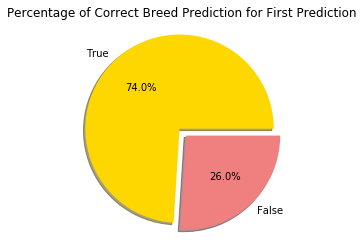

In [51]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'True', 'False'
sizes = [74, 26]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
autopct='%1.1f%%', shadow=True, startangle= None)
 
plt.title('Percentage of Correct Breed Prediction for First Prediction')
plt.axis('equal')
plt.show()